<a href="https://colab.research.google.com/github/DaverArenas/MachineLearning_Introduction/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Metodos no Supervisados   

Carlos Manuel Restrepo   
Fundamentos de Analitica de Datos    
Universidad EIA   

In [ ]:
import pandas as pd
from copy import deepcopy
from time import sleep
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Que es Clustering
Son unas tecnicas o metodos usados para particionar la data en grupos o clusters.   
Un cluster es en si un grupo de objetos que son mas similares entre ellos. Esto nos ayuda a encontrar dos cualidades en la data.
- Significado
- Utilidad


## Que usos le podemos dar?   
Si bien principalmente se pueden usar para dividir mi dataset y encontrar relaciones que me ayuden a reducir el tamanio de este el clustering va mas alla de esto, algunos de sus usos mas comunes son:
- Las empresas los usan para segmentar clientes. (compras similares)
- Separar Documentos
- Analisis de Redes Sociales.


## Metodos
Dada la gran cantidad de formas de realizar un cluster estos se dividieron en tres categorias principales que contienen los metodos mas usados.
- Clustering Particional
- Clustering jerarquico
- Clustering basado en densidades

### Clustering Particional
En este metodo dividimos los datos en diferentes grupos de manera que cada elemento no puede ser miembro de mas de un cluster.
para poder relizarla debemos de definirle el numero de clusters K.

Algoritmos mas populares.
- K-means
- K-medoids.

Ambos son no-deterministicos lo que signifaca que pueden retornar dos resultados diferentes en dos corridas del algoritmo.

PRO:
- Usa principios matematicos que se explican de manera extremadamente facil
- Se adapta a varios contextos.
- Funcionan muy bien cuando la forma de la data es circular y bien definida.
- Escalan muy facil con la cantidad de datos.   

CONS:
- Debemos suponer el parametro K
- Sigue siendo no deterministico
- No funcionan muy bien en formas complejas o en datos con alto nivel de dispersion.


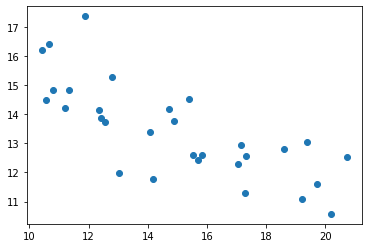

In [ ]:
# Creamos data random para el ejemplo


center_box = (10, 20) #
data = make_blobs(n_samples=30, centers=3, center_box=center_box)

data = pd.DataFrame(data[0])

plt.scatter(data[0],data[1])

In [ ]:
data

,0,1
0,11.335782,14.816685
1,10.578015,14.500478
2,12.406989,13.879036
3,12.541536,13.725157
4,18.593539,12.814350
5,17.328185,12.578165
6,14.870517,13.750608
7,17.158255,12.954053
8,13.020641,11.991493
9,20.713578,12.539002


In [ ]:
centroides = []
# Ubicamos en el plano los centroides
for i in range(3):
    rand_x = rd.randint(int(data[0].min()),int(data[0].max()))
    rand_y = rd.randint(int(data[1].min()),int(data[1].max()))
    centroides.append([rand_x, rand_y])

centroides = pd.DataFrame(centroides)
print(centroides)

    0   1
0  15  19
1  12  21
2  17  19


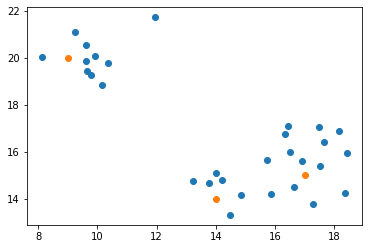

In [ ]:
#Graficamos los datos contra los k-means o centroides
plt.scatter(data[0],data[1])
plt.scatter(centroides[0],centroides[1])

In [ ]:
##Se cálcula la distancia de los datos a los k-means. Es decir, buscamos cada una de las distancias entre un dato y los k-means. 
##Si tenemos tres k-means, habran 3 distancias por cada dato
#Esto para determinar cúal es la menor distancia 
distancias = []
for i in data.values:
  distancias_centroides = []
  for j in centroides.values:
    x = (i[0]-j[0])**2
    y = (i[1]-j[1])**2
    dist = math.sqrt(x + y)
    distancias_centroides.append(dist)
  distancias.append(distancias_centroides)
distancias

[[4.376602616992938, 9.358873069457767, 1.5600759789376237],
 [4.62884484026283, 8.996644070476762, 2.094948842269043],
 [1.0873154774607332, 6.728814150279157, 3.7807140626023448],
 [8.418735448734871, 0.8633006562150234, 10.196282282081265],
 [4.3608884243646955, 10.99368897117101, 1.560746212988221],
 [4.820122802251153, 10.252705450350218, 1.696220930745449],
 [0.8467006519454708, 8.65514274986846, 3.018774380328783],
 [3.345871407660587, 9.05031187423906, 0.6315835979641856],
 [3.2945198913323597, 10.362940995488524, 1.2554577483727354],
 [3.951189284523007, 7.990910709351244, 2.173787211188115],
 [3.601538719674918, 8.007933834678937, 1.8811645297093456],
 [7.317804828271878, 0.9100412234451294, 8.716168676169625],
 [2.6767206794641005, 9.41056162919576, 0.627134462772817],
 [5.053277642059138, 9.68515416907943, 2.1971810544464043],
 [6.742626212103535, 1.0773497388413278, 8.379083109769077],
 [7.988283818664898, 3.4066268514347797, 8.409947424948388],
 [7.323605306500858, 0.6273

In [ ]:
##Este código separa los datos en clusters, dependiendo la distancia de cada dato a los puntos (K-means)
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i in range(len(distancias)):
  minimo = distancias[i].index(min(distancias[i]))
  if minimo == 0:
    cluster_1.append([data[0][i], data[1][i]])
  elif minimo == 1:
    cluster_2.append([data[0][i], data[1][i]])
  else:
    cluster_3.append([data[0][i], data[1][i]])

In [ ]:
##Se calcula el centroide del cluster1. Es decir, se reubica los k-means para que quede en el centroide del cluster. Por que incialmente partieron de un punto aleatorio
c_1x = 0
c_1y = 0
for i in cluster_1:
  c_1x += i[0]
  c_1y += i[1]

centroides[0][0] = c_1x/len(cluster_1)
centroides[1][0] = c_1y/len(cluster_1)

In [ ]:
##Se calcula el centroide del cluster2
c_2x = 0
c_2y = 0

for i in cluster_2:
  c_2x += i[0]
  c_2y += i[1]

centroides[0][1] = c_2x/len(cluster_2)
centroides[1][1] = c_2y/len(cluster_2)

In [ ]:
##Se calcula el centroide del cluster3
c_3x = 0
c_3y = 0
for i in cluster_3:
  c_3x += i[0]
  c_3y += i[1]

centroides[0][2] = c_3x/len(cluster_3)
centroides[1][2] = c_3y/len(cluster_3)

#### Ahora a las librerias

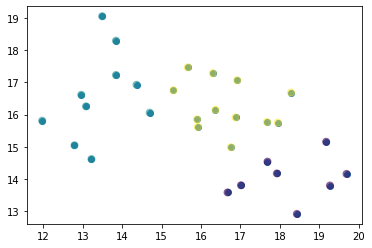

In [ ]:
##Con este código graficamos los clusters, definiendo el numero de k-means que queremos usar para clusterizar
from sklearn.cluster import KMeans

center_box = (10, 20) #
data = make_blobs(n_samples=30, centers=3, center_box=center_box)

data = pd.DataFrame(data[0])

plt.scatter(data[0],data[1])


distortions = []
K = range(1,4)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.scatter(data[0], data[1], c= kmeanModel.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroides[0], centroides[1], c='red', s=50)
plt.show()

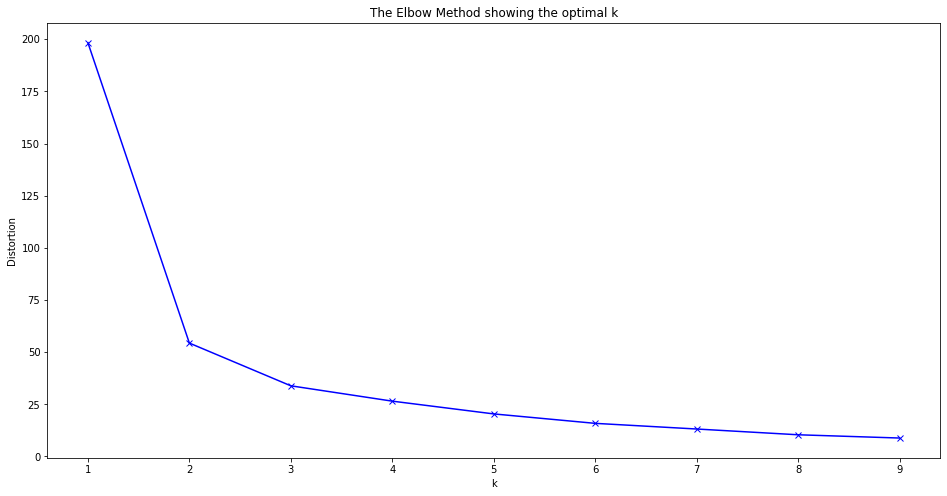

In [ ]:
##La siguiente gráfica muestra el numero de k-means VS  la distorción(En esta caso el número óptimo de clusters es k=3)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Clustering Jerarquico
En este metodo nos enfocamos en crear clusters que llevan una jerarquia puede ser de manera aglomerativa(top-down) o de manera dicisible(bottom-up).   
Estos metodos resultan en una jerarquia de puntos llamada Dendrograma y aqui asignamos los clusters K partiendo el dendrograma.

Algoritmos mas populares.
- Jerarquico

Es uno de los pocos deterministicos lo que significa que retorna siempre el mismo resultado

PRO:
- Ayuda a entender las relaciones mas pequenias en un
- Retornan un Dendograma.   

CONS:
- No Escalan muy bien con la cantidad de datos por la cantidad de computaciones.
- Son sencibles a ruido y outliers


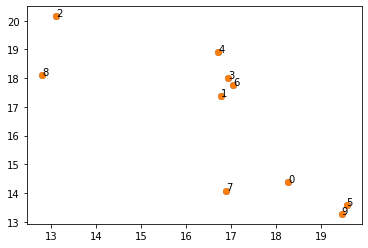

In [ ]:
# Grafico mis datos
center_box = (10, 20) #
data = make_blobs(n_samples=10, centers=5, center_box=center_box)

data = pd.DataFrame(data[0])

plt.scatter(data[0],data[1])
plt.scatter(data[0], data[1])
# Por motivos de visualizacion asignaremos valores a los puntos
for i in range(10):
  plt.annotate(i, (data[0][i], data[1][i]))

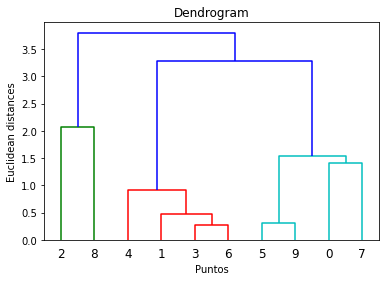

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data))
plt.title('Dendrogram')
plt.xlabel('Puntos')
plt.ylabel('Euclidean distances')
plt.show()

dict_values([[[55.0, 55.0, 65.0, 65.0], [45.0, 45.0, 60.0, 60.0], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [52.5, 52.5, 82.5, 82.5], [35.0, 35.0, 67.5, 67.5], [25.0, 25.0, 51.25, 51.25], [15.0, 15.0, 38.125, 38.125], [115.0, 115.0, 125.0, 125.0], [145.0, 145.0, 155.0, 155.0], [135.0, 135.0, 150.0, 150.0], [120.0, 120.0, 142.5, 142.5], [165.0, 165.0, 175.0, 175.0], [185.0, 185.0, 195.0, 195.0], [170.0, 170.0, 190.0, 190.0], [131.25, 131.25, 180.0, 180.0], [105.0, 105.0, 155.625, 155.625], [26.5625, 26.5625, 130.3125, 130.3125], [5.0, 5.0, 78.4375, 78.4375], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [285.0, 285.0, 295.0, 295.0], [275.0, 275.0, 290.0, 290.0], [265.0, 265.0, 282.5, 282.5], [242.5, 242.5, 273.75, 273.75], [225.0, 225.0, 258.125, 258.125], [215.0, 215.0, 241.5625, 241.5625], [205.0, 205.0, 228.28125, 228.28125], [41.71875, 41.71875, 216.640625, 216.640625]], [[0.0, 0.24610833194471343, 0.24610833194471343, 0.0], [0.0, 0.2677174547435367, 0.267717

### Clustering Basado en Densidades
Este metodo ayuda a determinar clusters de datos basados en la densidad de la data en una region.

Algoritmos mas populares.
- DBSCAN
- OPTICS

PRO:
- funcionan muy bien con formas no esfericas
- No tienen problemas con los outliers.

CONS:
- No funcionan muy bien a altas dimensiones.
- No reconocen muy bien densidades muy variables.

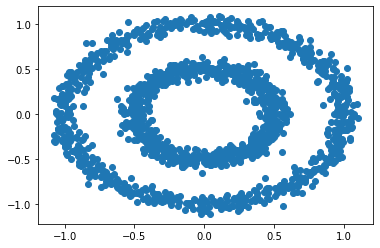

In [ ]:
from sklearn import cluster, datasets
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
points=noisy_circles[0]
plt.scatter(points[:,0], points[:,1])

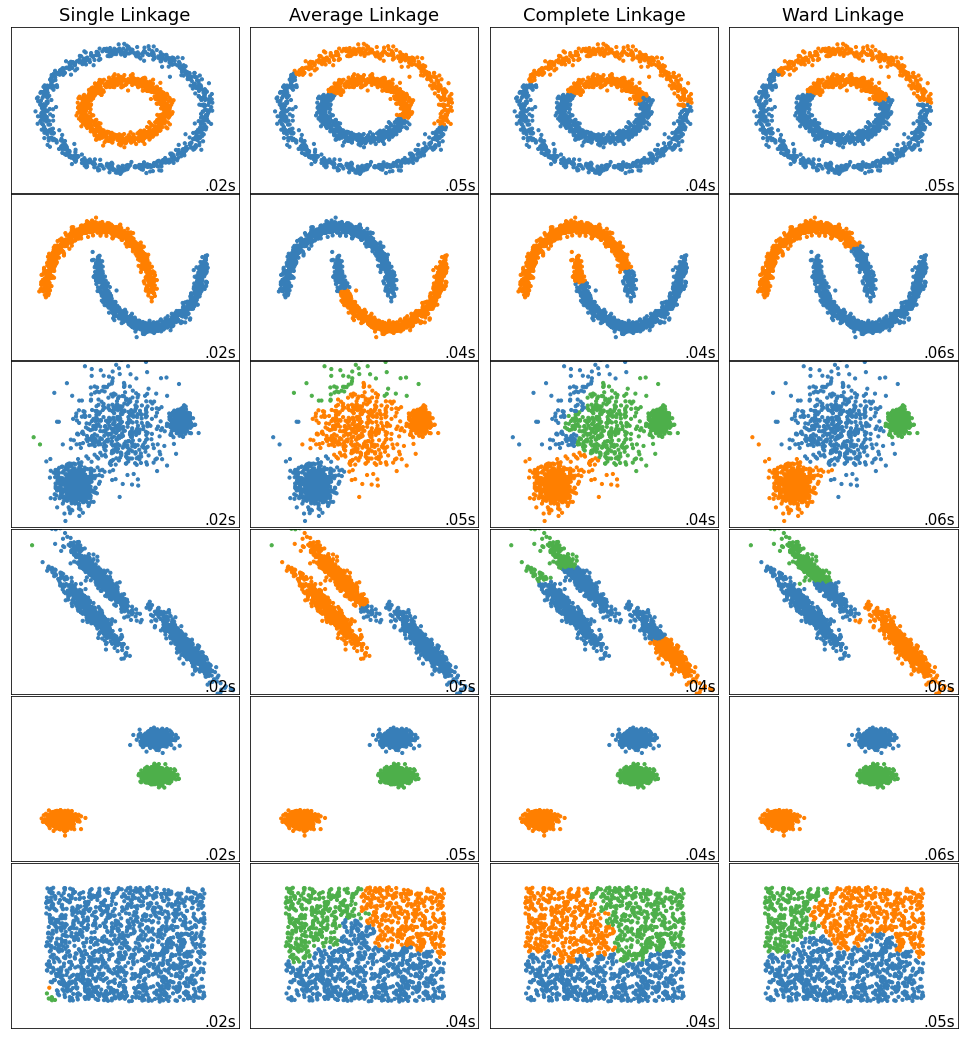

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EJERCICIO CLUSTERIZACIÓN

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/FundamentosAnalitica/CSV/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X1 = df[['Age', 'Spending Score (1-100)']]
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [ ]:
#Clusterización inicial con k-means = 3
alg1 = KMeans(n_clusters=3, random_state=15)

In [ ]:
alg1.fit(X1)

KMeans(n_clusters=3, random_state=15)

In [ ]:
alg1.inertia_

45840.67661610866

In [ ]:
#Centroides
centroides = alg1.cluster_centers_

(Text(0, 0.5, 'Spending Score (1-100)'), Text(0.5, 0, 'Age'))

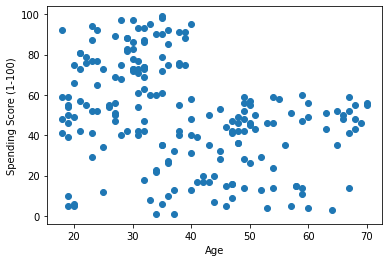

In [ ]:
plt.scatter(x='Age', y='Spending Score (1-100)', data=X1)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')

(Text(0, 0.5, 'Spending Score (1-100)'), Text(0.5, 0, 'Age'))

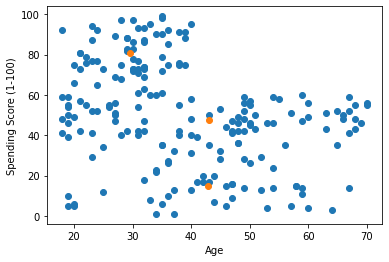

In [ ]:
plt.scatter(x='Age', y='Spending Score (1-100)', data=X1)
plt.scatter(x=centroides[:,0], y=centroides[:,1])
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')

In [ ]:
##Calculamos las inercias clusterizando con varios k-means. Para mirar la gráfica del codo
inercias = []

for i in range(1,10):
  alg = KMeans(n_clusters=i, random_state=15)
  alg.fit(X1)
  inercia = alg.inertia_
  inercias.append(inercia)

In [ ]:
inercias

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23810.46223307136,
 19515.469235676603,
 15572.637833015258,
 13010.462877862876,
 11453.288911292719]

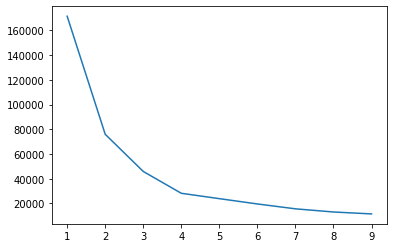

In [ ]:
plt.plot(np.arange(1,10), inercias)

In [ ]:
#Escogemos el numero de k-means más optimo segun la grafica anterior. En este caso K-means=4. EN EL CODO. El codo dice cual punto entre codos no hay un cambio de distorción grande.
alg_final = KMeans(n_clusters=4, random_state=15)
alg_final.fit(X1)

KMeans(n_clusters=4, random_state=15)

In [ ]:
##Definimos una variable con los centroides para graficar
centroidesF = alg_final.cluster_centers_

In [ ]:
#Definimos una variable labels con los labes para graficar
labels = alg_final.labels_

(Text(0, 0.5, 'Spending Score (1-100)'), Text(0.5, 0, 'Age'))

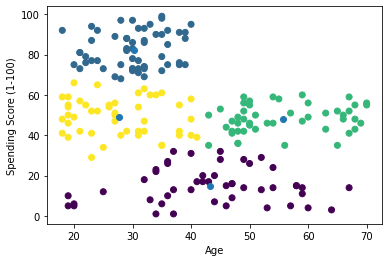

In [ ]:
#Gráficamos los clusters
plt.scatter(x='Age', y='Spending Score (1-100)', data=X1, c = labels)
plt.scatter(x=centroidesF[:,0], y=centroidesF[:,1])
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')

In [ ]:
#Podemos hacer la clusterización con diferentes variables
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


(Text(0, 0.5, 'Spending Score (1-100)'), Text(0.5, 0, 'Annual Income (k$)'))

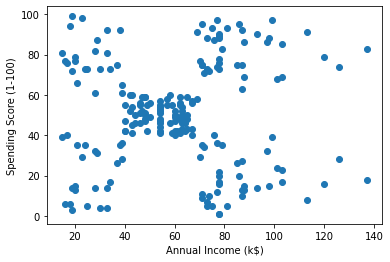

In [ ]:
#Revisamos la gráfica de dispersión entre las variables
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=X2)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')

In [ ]:
##Calculamos las inercias clusterizando con varios k-means. Para mirar la gráfica del codo
inercias2 = []

for i in range(1,10):
  alg = KMeans(n_clusters=i, random_state=15)
  alg.fit(X2)
  inercia = alg.inertia_
  inercias2.append(inercia)

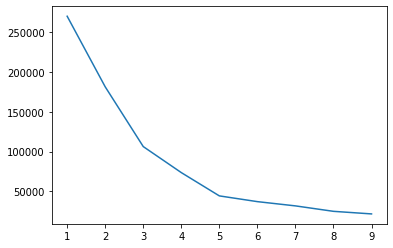

In [ ]:
plt.plot(np.arange(1,10), inercias2)

In [ ]:
#Escogemos el numero de k-means más optimo segun la grafica anterior. En este caso K-means=4. EN EL CODO. El codo dice cual punto entre codos no hay un cambio de distorción grande.
alg_final2 = KMeans(n_clusters=5, random_state=15)
alg_final2.fit(X2)

KMeans(n_clusters=5, random_state=15)

In [ ]:
##Definimos una variable con los centroides para graficar
centroidesF2 = alg_final2.cluster_centers_
#Definimos una variable labels con los labes para graficar
labels2 = alg_final2.labels_

(Text(0, 0.5, 'Spending Score (1-100)'), Text(0.5, 0, 'Age'))

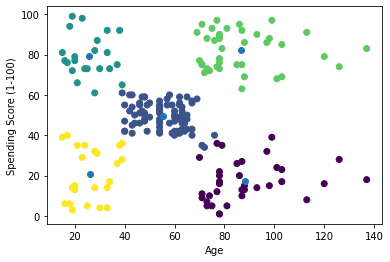

In [ ]:
#Gráficamos los clusters
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=X2, c = labels2)
plt.scatter(x=centroidesF2[:,0], y=centroidesF2[:,1])
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')